In [1]:
SEED = 42

import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import seaborn as sns

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
from classifier import MnistClassifier
from dataloader import train_set, test_set, get_dataloader


train_loader = get_dataloader(train_set, batch_size=240, shuffle=True)
test_loader = get_dataloader(test_set, batch_size=240, shuffle=False)

# Random Forest
Accuracy: 0.9704
F1-score: 0.9701686082274481
Confusion matrix:


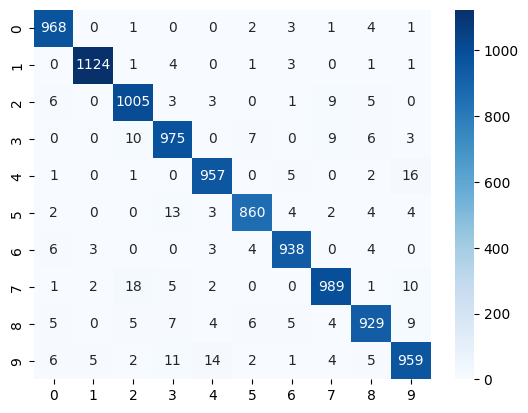

In [3]:
rf_classifier = MnistClassifier("rf")
rf_classifier.train(train_loader)
predictions, metrics = rf_classifier.predict(test_loader, metrics=True)
print(f"# Random Forest\nAccuracy: {metrics['accuracy']}\nF1-score: {metrics['f1']}\nConfusion matrix:")
hm = sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.show()

Epoch 1/7: 100%|██████████| 250/250 [00:12<00:00, 20.36batch/s]


Epoch 1/7, Loss: 0.3283207365870476


Epoch 2/7: 100%|██████████| 250/250 [00:12<00:00, 20.35batch/s]


Epoch 2/7, Loss: 0.1434700976908207


Epoch 3/7: 100%|██████████| 250/250 [00:11<00:00, 21.41batch/s]


Epoch 3/7, Loss: 0.10022170688211918


Epoch 4/7: 100%|██████████| 250/250 [00:11<00:00, 21.10batch/s]


Epoch 4/7, Loss: 0.0767020232975483


Epoch 5/7: 100%|██████████| 250/250 [00:12<00:00, 20.11batch/s]


Epoch 5/7, Loss: 0.062112687297165396


Epoch 6/7: 100%|██████████| 250/250 [00:12<00:00, 20.79batch/s]


Epoch 6/7, Loss: 0.05109706437587738


Epoch 7/7: 100%|██████████| 250/250 [00:11<00:00, 21.95batch/s]


Epoch 7/7, Loss: 0.04307465859502554
# Feedforward neural network
Accuracy: 0.979
F1-score: 0.9789500365605885
Confusion matrix:


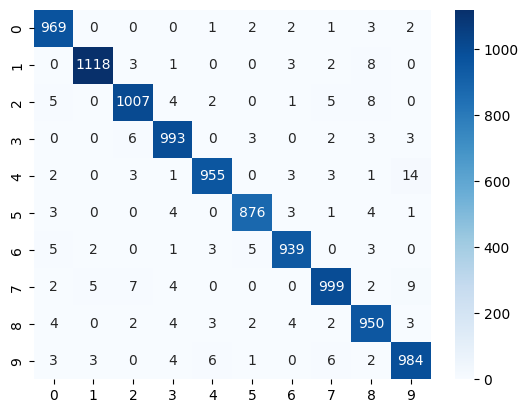

In [4]:
nn_classifier = MnistClassifier("nn")
nn_classifier.train(train_loader, epochs=7, lr=0.2)
predictions, metrics = nn_classifier.predict(test_loader, metrics=True)
print(f"# Feedforward neural network\nAccuracy: {metrics['accuracy']}\nF1-score: {metrics['f1']}\nConfusion matrix:")
hm = sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.show()

Epoch 1/5: 100%|██████████| 250/250 [00:28<00:00,  8.69batch/s]


Epoch 1/5, Loss: 0.22869991506636142


Epoch 2/5: 100%|██████████| 250/250 [00:34<00:00,  7.35batch/s]


Epoch 2/5, Loss: 0.055353426456451416


Epoch 3/5: 100%|██████████| 250/250 [00:30<00:00,  8.22batch/s]


Epoch 3/5, Loss: 0.03887974978983402


Epoch 4/5: 100%|██████████| 250/250 [00:30<00:00,  8.30batch/s]


Epoch 4/5, Loss: 0.03008780120126903


Epoch 5/5: 100%|██████████| 250/250 [00:27<00:00,  9.00batch/s]


Epoch 5/5, Loss: 0.024201485863886773
# Convolutional neural network
Accuracy: 0.9914
F1-score: 0.9913606703222895
Confusion matrix:


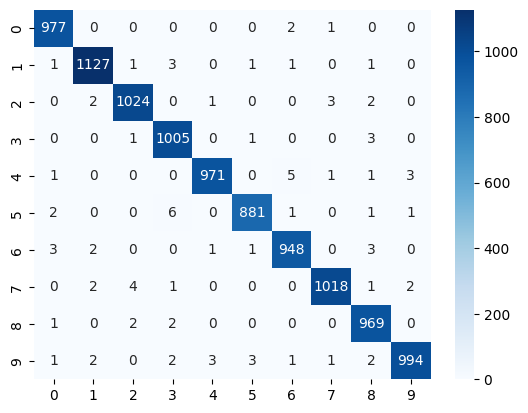

In [5]:
cnn_classifier = MnistClassifier("cnn")
cnn_classifier.train(train_loader, epochs=5, lr=1e-3)
predictions, metrics = cnn_classifier.predict(test_loader, metrics=True)
print(f"# Convolutional neural network\nAccuracy: {metrics['accuracy']}\nF1-score: {metrics['f1']}\nConfusion matrix:")
hm = sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.show()

#### Trying on custom data

In [6]:
from PIL import Image
import numpy as np

def predict_png(path: str, classifier: MnistClassifier):
    im_frame = Image.open(path)
    np_frame = np.array(im_frame.getdata())
    np_frame = np.mean(np_frame, axis=-1)   # getting mean by channels
    np_frame = np_frame.reshape(1, 1, 28, 28).astype(np.float32)
    np_frame = np_frame / 255   # normalization

    print("Class:", classifier.predict(np_frame)[0])
    plt.imshow(im_frame)
    plt.axis('off')
    plt.show()

Class: 1


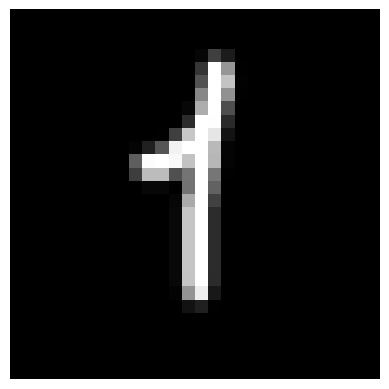

In [7]:
predict_png("./assets/1.png", cnn_classifier)